## Import Mask Data

molecule_name:       Symbolic name of each molecule.  Musks have names such
                        as MUSK-188.  Non-musks have names such as
                        NON-MUSK-jp13.
                        
conformation_name:   Symbolic name of each conformation.  These
                        have the format MOL_ISO+CONF, where MOL is the
                        molecule number, ISO is the stereoisomer
                        number (usually 1), and CONF is the
                        conformation number. 
                        
f1 through f162:     These are "distance features" along rays (see
                      paper cited above).  The distances are
                        measured in hundredths of Angstroms.  The
                        distances may be negative or positive, since
                        they are actually measured relative to an
                        origin placed along each ray.  The origin was
                        defined by a "consensus musk" surface that is
                        no longer used.  Hence, any experiments with
                        the data should treat these feature values as
                        lying on an arbitrary continuous scale.  In
                        particular, the algorithm should not make any
                        use of the zero point or the sign of each
                        feature value. 
                        
   f163:                This is the distance of the oxygen atom in the
                        molecule to a designated point in 3-space.
                        This is also called OXY-DIS.
                        
   f164:                OXY-X: X-displacement from the designated
                        point.
                        
   f165:                OXY-Y: Y-displacement from the designated
                        point.
                        
   f166:                OXY-Z: Z-displacement from the designated
                        point. 
                        
   class:               0 => non-musk, 1 => musk


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

musk=pd.read_csv('musk.csv')
musk.head(10)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-146,37,1


In [2]:
musk.shape

(6598, 170)

In [3]:
musk['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [4]:
musk_copy=musk.copy()
musk_copy=musk_copy.drop(['ID', 'molecule_name','conformation_name'], axis=1)
musk_copy.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1
5,46,-194,-145,28,-117,72,57,-168,-39,-22,...,-138,-156,56,143,142,164,-67,-145,40,1
6,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-133,-153,55,144,142,165,-68,-145,37,1
7,41,-199,-101,22,-117,-6,26,-99,-21,-101,...,-59,-1,50,100,135,169,-60,-135,81,1
8,41,-199,-101,22,-117,-6,26,-100,-21,-101,...,-59,-1,50,100,135,169,-60,-135,81,1
9,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-133,-153,55,144,142,165,-68,-146,37,1


In [5]:
# Clean up dataframe and select target
target = 'class'
features = musk_copy.columns != target

x = musk_copy.loc[:, features]
y = musk_copy[target]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4948, 166) (1650, 166) (4948,) (1650,)


## Implement ANN On Entire Dataset

In [7]:
#Implementing Deep Learning Model using Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier
import keras
import time

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Dense(200,input_shape=(166,), activation='relu'))
model.add(Dense(200, kernel_constraint=maxnorm(3), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.8, decay=0.001, nesterov=False)
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
my_model = model.fit(x_train,y_train,epochs=80, batch_size=800, verbose=1,validation_data=(x_train,y_train))

Train on 4948 samples, validate on 4948 samples
Epoch 1/80
4948/4948 [==============================] - 10s 2ms/step - loss: 2.8296 - acc: 0.8165 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 2/80
4948/4948 [==============================] - 0s 18us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 3/80
4948/4948 [==============================] - 0s 19us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 4/80
4948/4948 [==============================] - 0s 19us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 5/80
4948/4948 [==============================] - 0s 19us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 6/80
4948/4948 [==============================] - 0s 19us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 7/80
4948/4948 [==============================] - 0s 21us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 8

Epoch 61/80
4948/4948 [==============================] - 0s 18us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 62/80
4948/4948 [==============================] - 0s 16us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 63/80
4948/4948 [==============================] - 0s 17us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 64/80
4948/4948 [==============================] - 0s 18us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 65/80
4948/4948 [==============================] - 0s 18us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 66/80
4948/4948 [==============================] - 0s 16us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 67/80
4948/4948 [==============================] - 0s 18us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 68/80
4948/4948 [=========================

In [10]:
y_pred_nn = model.predict_classes(x_test)
y_pred_nn

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [11]:
syn=pd.concat([x_test, y_test],axis=1)
syn['class'].value_counts() #Class distribution in test datasets

0    1389
1     261
Name: class, dtype: int64

In [12]:
y_pred_nn=pd.DataFrame(y_pred_nn)
y_pred_nn.columns=['class']
y_pred_nn['class'].value_counts() #Class predicted in test dataset by neural networks

0    1650
Name: class, dtype: int64

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'XGB_Prediction')]

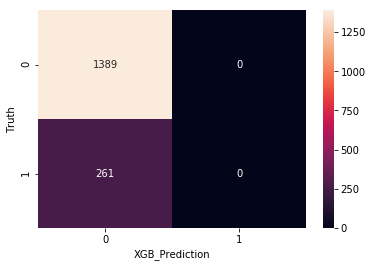

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d')
ax.set(xlabel='XGB_Prediction', ylabel='Truth')

In [14]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1389
           1       0.00      0.00      0.00       261

    accuracy                           0.84      1650
   macro avg       0.42      0.50      0.46      1650
weighted avg       0.71      0.84      0.77      1650



C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
accuracy_score(y_test, y_pred_nn)

0.8418181818181818

## Feature Selection for Neural Network Modelling

In [16]:
def m_model():
    model = Sequential()
    model.add(Dense(200,input_shape=(166,), activation='relu'))
    model.add(Dense(200, kernel_constraint=maxnorm(3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1,activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.8, decay=0.001, nesterov=False)
    tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [17]:
my_model = KerasClassifier(build_fn=m_model,epochs=80, batch_size=800, verbose=1)

In [18]:
from sklearn.feature_selection import RFE

selector = RFE(my_model,40, step=1)
selector = selector.fit(x, y)

Epoch 1/80
6598/6598 [==============================] - 0s 55us/step - loss: 2.8107 - acc: 0.8206
Epoch 2/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 3/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 4/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 5/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 6/80
6598/6598 [==============================] - 0s 14us/step - loss: 2.4844 - acc: 0.8459
Epoch 7/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 8/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 9/80
6598/6598 [==============================] - 0s 13us/step - loss: 2.4844 - acc: 0.8459
Epoch 10/80
6598/6598 [==============================] - 0s 12us/step - loss: 2.4844 - acc: 0.8459
Epoch 11/80
6598/65

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

## Implement XGB


In [19]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=100, learning_rate=0.12, seed=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.12, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=100, silent=True, subsample=1)

In [20]:
from sklearn.model_selection import cross_validate

# cross validate XGBoost Classifier
scores_xgb = cross_validate(xgb, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_xgb =pd.DataFrame(scores_xgb)
scores_xgb

,fit_time,score_time,test_score,train_score
0,1.779511,0.020263,0.974152,0.977131
1,1.730348,0.005064,0.969305,0.978748
2,1.764685,0.005006,0.961228,0.978748
3,1.645438,0.010104,0.964459,0.978748
4,1.621781,0.002056,0.954693,0.982448
5,1.595404,0.005011,0.962783,0.981062
6,1.589014,0.006086,0.964401,0.980600
7,1.582236,0.010085,0.964401,0.978984


In [21]:
print('Mean Test Score of XGBoost Classifier: ', scores_xgb ['test_score'].mean())
print('Mean Train Score of XGBoost Classifier: ', scores_xgb ['train_score'].mean())

Mean Test Score of XGBoost Classifier:  0.9644277621803619
Mean Train Score of XGBoost Classifier:  0.9795587001995778


In [22]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'XGB_Prediction')]

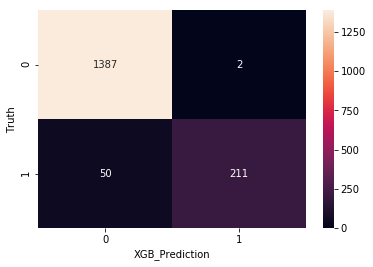

In [23]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
ax.set(xlabel='XGB_Prediction', ylabel='Truth')

In [24]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1389
           1       0.99      0.81      0.89       261

    accuracy                           0.97      1650
   macro avg       0.98      0.90      0.94      1650
weighted avg       0.97      0.97      0.97      1650



In [25]:
accuracy_score(y_test, y_pred_xgb)

0.9684848484848485

In [26]:
def plot_feature_importances (model, kind, title, color, dataframe):
    importances = pd.Series(data=model.feature_importances_, index= dataframe.columns)
    # Sort importances
    importances_sorted = importances.sort_values()
    # Draw a horizontal barplot of importances_sorted
    importances_sorted.plot(kind=kind, color=color)
    plt.title(title)
    return(plt.show())

In [27]:
importances = pd.Series(data=xgb.feature_importances_, index= x_train.columns)
# Sort importances
importances_sorted = importances.sort_values()
importances_sorted[importances_sorted>0.01] #Most significant features with weights above 0.01 detected by XGBoost model

f58     0.010363
f144    0.010363
f34     0.010363
f136    0.010363
f71     0.010363
f6      0.010363
f63     0.010363
f133    0.010363
f138    0.010363
f55     0.010363
f7      0.010363
f68     0.012090
f146    0.012090
f99     0.012090
f17     0.012090
f59     0.012090
f25     0.012090
f117    0.012090
f67     0.012090
f165    0.012090
f83     0.013817
f72     0.013817
f4      0.013817
f9      0.013817
f61     0.013817
f43     0.013817
f102    0.015544
f91     0.015544
f66     0.015544
f132    0.017271
f22     0.017271
f116    0.018998
f151    0.018998
f110    0.018998
f122    0.022453
f1      0.024180
f111    0.025907
f36     0.025907
f92     0.029361
f126    0.032815
f163    0.036269
dtype: float32

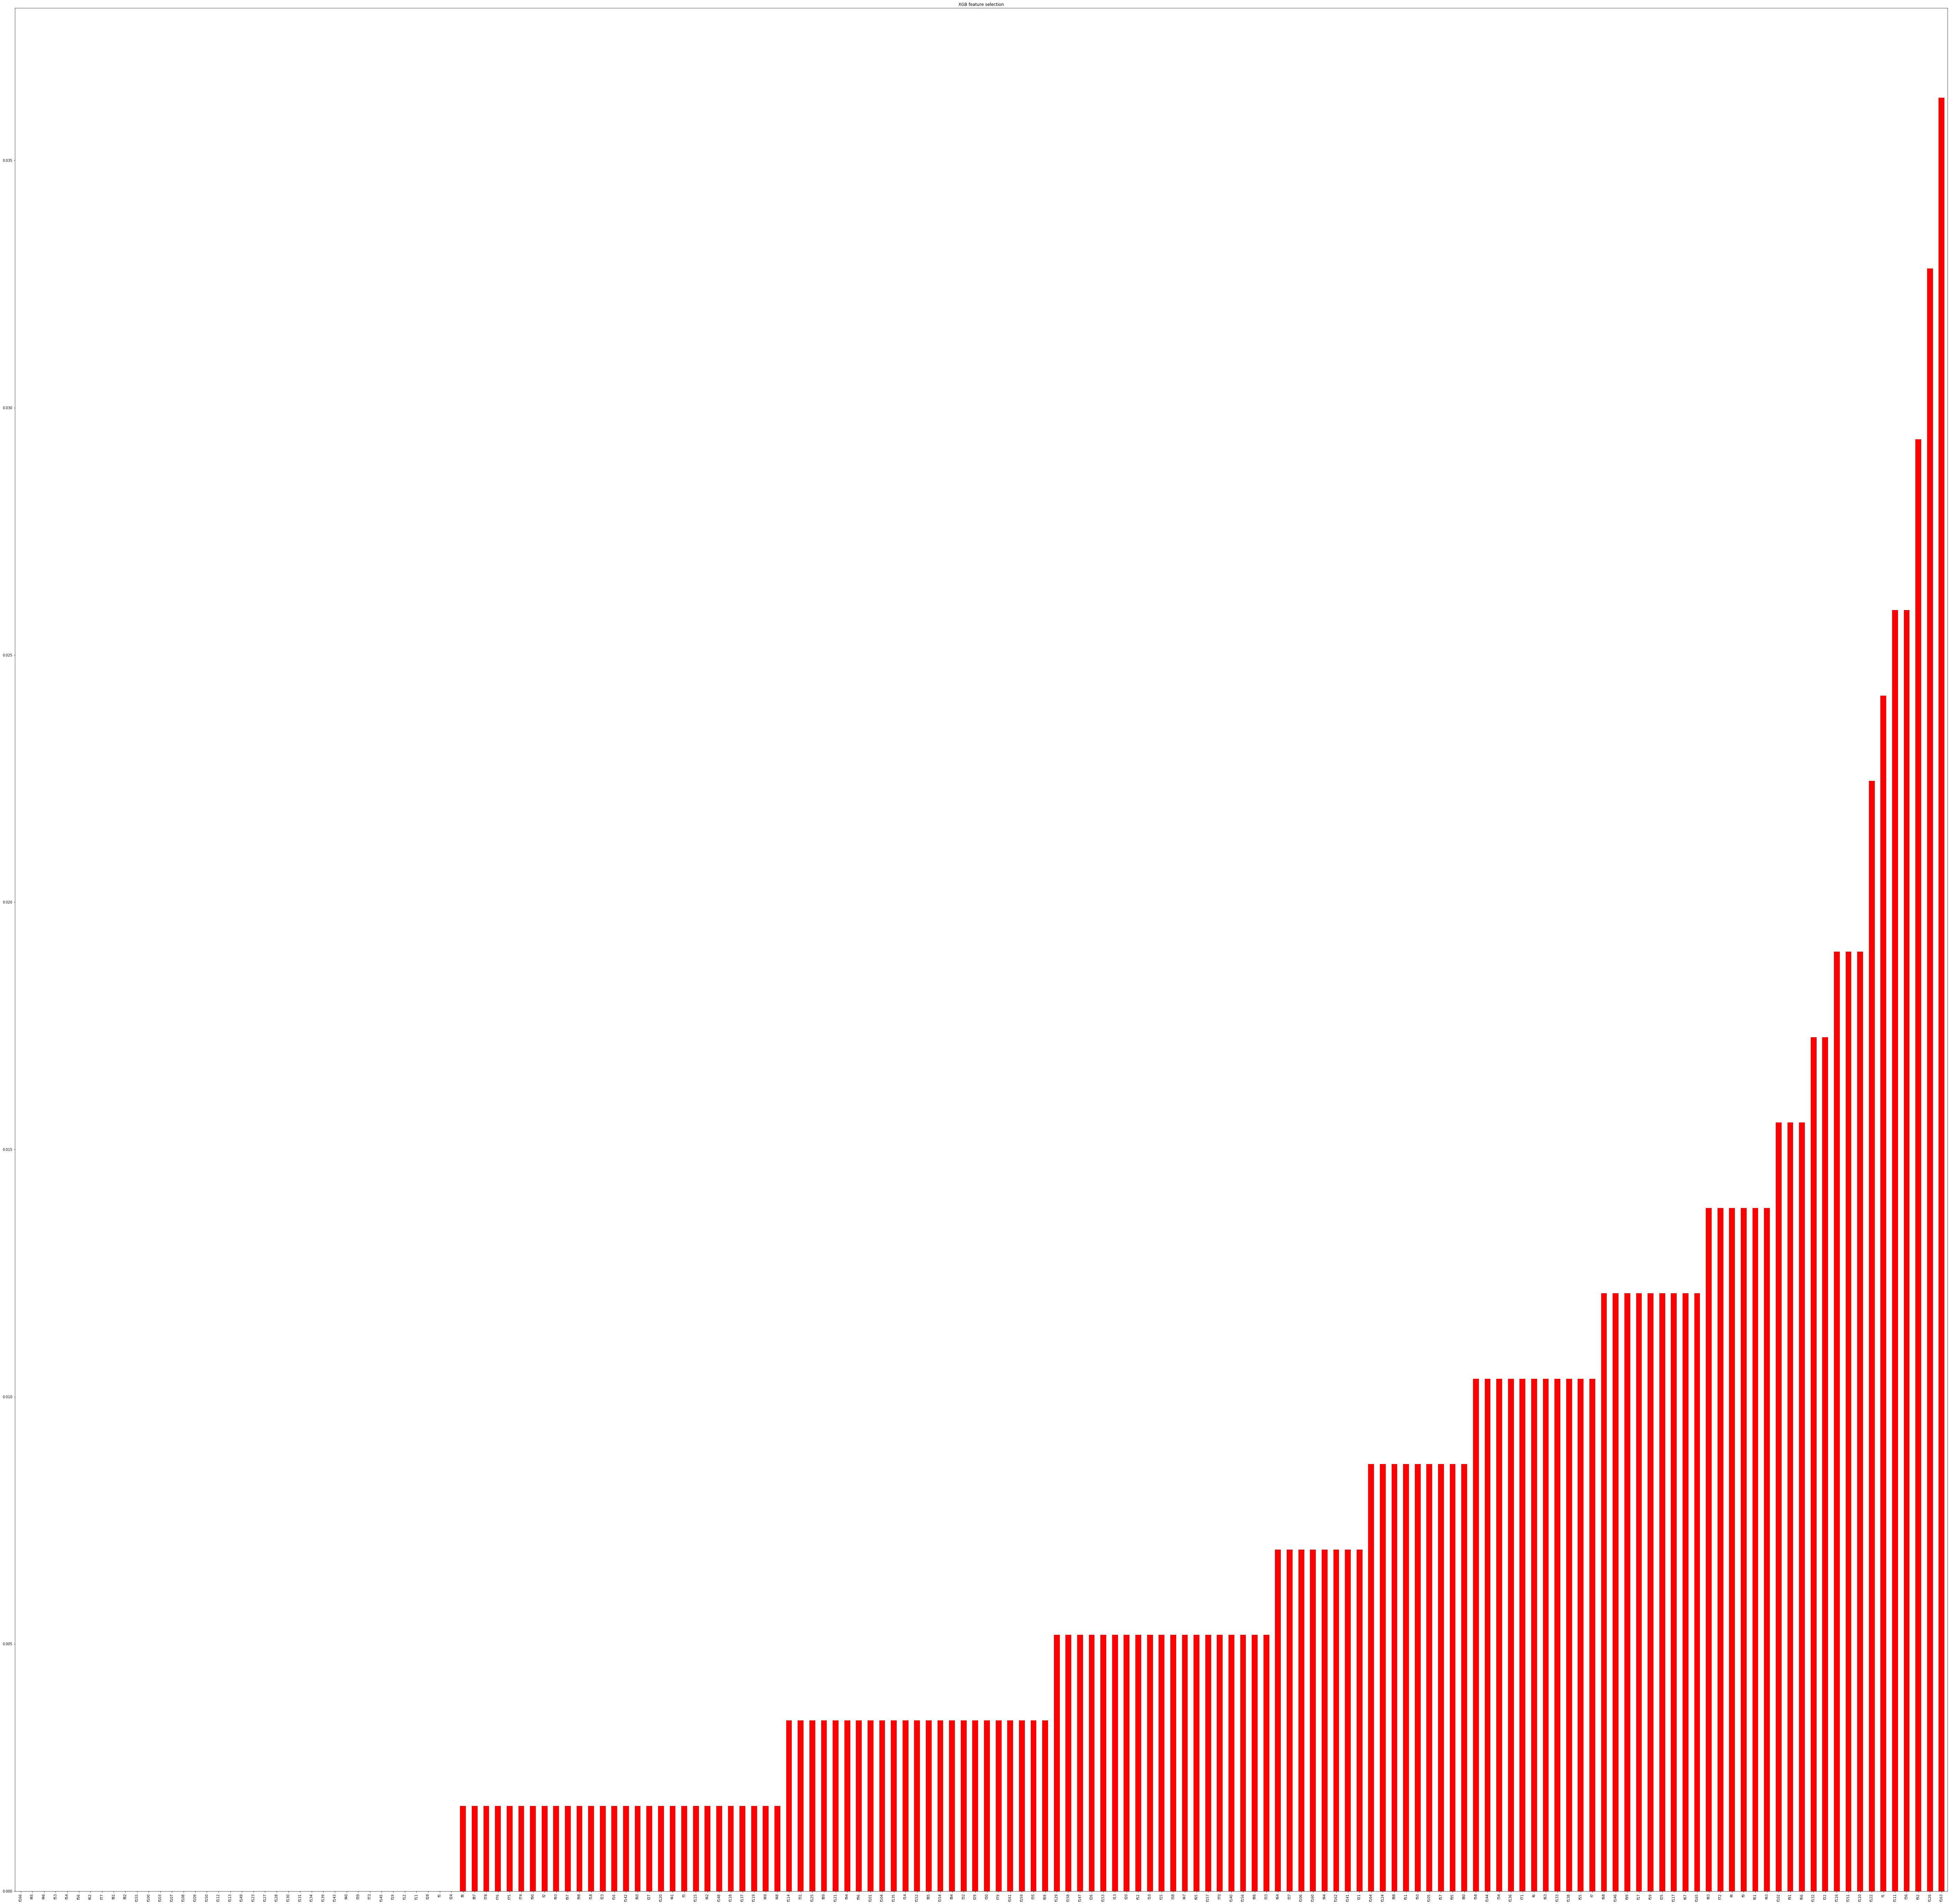

In [28]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(100,100))
plot_feature_importances (xgb, 'bar', 'XGB feature selection', 'red', x)

In [29]:
select_col=['class','f163','f126','f92','f36','f111','f1','f122','f110','f151','f116','f22','f132','f66','f91','f102','f43','f61','f9','f4','f72','f83','f165','f67','f117','f25','f59','f17','f99','f146','f68','f7','f55','f138','f133','f63','f6','f71','f136','f34','f144','f58']
musk_copy1=musk_copy[select_col]
musk_copy1.head()

,class,f163,f126,f92,f36,f111,f1,f122,f110,f151,...,f55,f138,f133,f63,f6,f71,f136,f34,f144,f58
0,1,156,25,119,63,-239,46,72,-280,-81,...,108,-13,-75,-15,49,-48,-19,5,-20,-151
1,1,169,-17,82,61,-231,41,131,-246,-41,...,107,-79,-72,13,-6,-156,-94,42,17,-140
2,1,165,19,47,71,-230,46,122,-247,-41,...,147,-72,-74,34,73,-157,-93,6,17,-139
3,1,168,-18,82,62,-231,41,131,-247,-41,...,107,-78,-73,12,-7,-156,-93,41,17,-140
4,1,168,-18,82,62,-231,41,131,-247,-41,...,107,-78,-73,12,-7,-156,-93,41,17,-140


In [30]:
# Clean up dataframe and select target
target = 'class'
features = musk_copy1.columns != target

x1 = musk_copy1.loc[:, features]
y1 = musk_copy1[target]

In [31]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=8)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(4948, 41) (1650, 41) (4948,) (1650,)


In [32]:
xgb1=XGBClassifier(n_estimators=120, learning_rate=0.12, seed=100, max_depth=5,reg_lambda=1.5)
xgb1.fit(x1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.12, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=120,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
              seed=100, silent=True, subsample=1)

In [33]:
# cross validate XGBoost Classifier
scores_xgb1 = cross_validate(xgb1, x1_train, y1_train, cv=8, return_train_score=True,return_estimator=False)
scores_xgb1 =pd.DataFrame(scores_xgb1)
scores_xgb1

,fit_time,score_time,test_score,train_score
0,1.016793,0.005107,0.980614,0.999307
1,1.024623,0.015208,0.991922,0.999307
2,0.905136,0.000000,0.975767,0.998845
3,0.910022,0.010001,0.983845,0.998845
4,0.880302,0.004509,0.962783,0.998845
5,0.889922,0.005054,0.985437,0.999307
6,0.949759,0.000000,0.978964,0.998845
7,0.984955,0.000000,0.982201,0.998845


In [34]:
print('Mean Test Score of XGBoost Classifier with reduced data: ', scores_xgb1 ['test_score'].mean())
print('Mean Train Score of XGBoost Classifier with reduced data: ', scores_xgb1 ['train_score'].mean())

Mean Test Score of XGBoost Classifier with reduced data:  0.9801917175107571
Mean Train Score of XGBoost Classifier with reduced data:  0.999018369053011


In [35]:
y_pred_xgb1 = xgb1.predict(x1_test)
y_pred_xgb1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'XGB1_Prediction')]

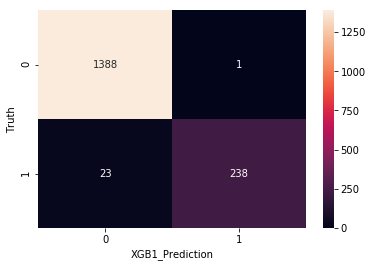

In [36]:
ax = sns.heatmap(confusion_matrix(y1_test, y_pred_xgb1), annot=True, fmt='d')
ax.set(xlabel='XGB1_Prediction', ylabel='Truth')

In [37]:
print(classification_report(y1_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1389
           1       1.00      0.91      0.95       261

    accuracy                           0.99      1650
   macro avg       0.99      0.96      0.97      1650
weighted avg       0.99      0.99      0.99      1650



In [38]:
accuracy_score(y1_test, y_pred_xgb1)

0.9854545454545455

## KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

weights='distance'
algorithm='auto'
n_neighbors=3
leaf_size=30

clf = KNeighborsClassifier(weights=weights,algorithm=algorithm,n_neighbors=n_neighbors, p=1,leaf_size=leaf_size)
clf.fit(x1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [40]:
# cross validate KNN Classifier
scores_clf = cross_validate(clf, x1_train, y1_train, cv=8, return_train_score=True,return_estimator=False)
scores_clf = pd.DataFrame(scores_clf)
scores_clf

,fit_time,score_time,test_score,train_score
0,0.023983,0.155186,0.964459,1.0
1,0.014545,0.085464,0.969305,1.0
2,0.020142,0.084892,0.959612,1.0
3,0.010098,0.079951,0.961228,1.0
4,0.010052,0.080029,0.948220,1.0
5,0.015097,0.065064,0.959547,1.0
6,0.010091,0.074990,0.967638,1.0
7,0.010002,0.090167,0.959547,1.0


In [41]:
print('Mean Test Score of KNN Classifier on reduced dataset: ', scores_clf ['test_score'].mean())
print('Mean Train Score of KNN Classifier on reduced dataset: ', scores_clf ['train_score'].mean())

Mean Test Score of KNN Classifier on reduced dataset:  0.9611944570792226
Mean Train Score of KNN Classifier on reduced dataset:  1.0


In [42]:
y_pred_clf = clf.predict(x1_test)
y_pred_clf

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'SVM_Prediction')]

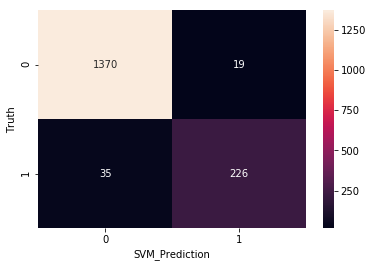

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y1_test, y_pred_clf), annot=True, fmt='d')
ax.set(xlabel='SVM_Prediction', ylabel='Truth')

In [44]:
print(classification_report(y1_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1389
           1       0.92      0.87      0.89       261

    accuracy                           0.97      1650
   macro avg       0.95      0.93      0.94      1650
weighted avg       0.97      0.97      0.97      1650



In [45]:
accuracy_score(y_pred_clf, y_test)

0.9672727272727273

#### Running KNN-Classifier On Entire Dataset

In [46]:
weights='distance'
algorithm='ball_tree'
n_neighbors=3

clf1 = KNeighborsClassifier(weights=weights,algorithm=algorithm,n_neighbors=n_neighbors, p=2)
clf1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [47]:
# cross validate KNN Classifier
scores_clf1 = cross_validate(clf1, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_clf1 = pd.DataFrame(scores_clf1)
scores_clf1

,fit_time,score_time,test_score,train_score
0,0.046745,0.560032,0.959612,1.0
1,0.079941,0.600233,0.974152,1.0
2,0.034696,0.535776,0.956381,1.0
3,0.035022,0.534452,0.970921,1.0
4,0.040110,0.554884,0.948220,1.0
5,0.035270,0.530252,0.970874,1.0
6,0.030009,0.550080,0.961165,1.0
7,0.035080,0.559686,0.959547,1.0


In [48]:
print('Mean Test Score of KNN Classifier: ', scores_clf1 ['test_score'].mean())
print('Mean Train Score of KNN Classifier: ', scores_clf1 ['train_score'].mean())

Mean Test Score of KNN Classifier:  0.962609007638377
Mean Train Score of KNN Classifier:  1.0


In [49]:
y_pred_clf1 = clf1.predict(x_test)
y_pred_clf1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'SVM_Prediction')]

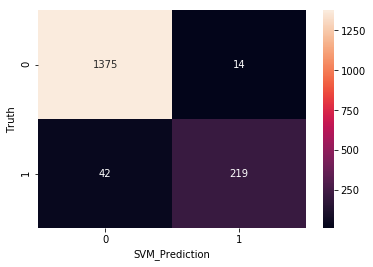

In [50]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_clf1), annot=True, fmt='d')
ax.set(xlabel='SVM_Prediction', ylabel='Truth')

In [51]:
print(classification_report(y_test, y_pred_clf1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1389
           1       0.94      0.84      0.89       261

    accuracy                           0.97      1650
   macro avg       0.96      0.91      0.93      1650
weighted avg       0.97      0.97      0.97      1650



In [52]:
accuracy_score(y_pred_clf1, y_test)

0.9660606060606061

## Feeding NN Network On Reduced Dataset

In [53]:
model1 = Sequential()
model1.add(Dense(80,input_shape=(41,), activation='relu'))
model1.add(Dense(80, kernel_constraint=maxnorm(3), activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1,activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.8, decay=0.001, nesterov=False)
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [54]:
history = model1.fit(x1_train,y1_train,epochs=80, batch_size=200, verbose=1,validation_data=(x1_train,y1_train))

Train on 4948 samples, validate on 4948 samples
Epoch 1/80
4948/4948 [==============================] - 1s 112us/step - loss: 2.5771 - acc: 0.8377 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 2/80
4948/4948 [==============================] - 0s 40us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 3/80
4948/4948 [==============================] - 0s 46us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 4/80
4948/4948 [==============================] - 0s 42us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 5/80
4948/4948 [==============================] - 0s 38us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 6/80
4948/4948 [==============================] - 0s 43us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 7/80
4948/4948 [==============================] - 0s 38us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 

Epoch 61/80
4948/4948 [==============================] - 0s 36us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 62/80
4948/4948 [==============================] - 0s 53us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 63/80
4948/4948 [==============================] - 0s 38us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 64/80
4948/4948 [==============================] - 0s 34us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 65/80
4948/4948 [==============================] - 0s 38us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 66/80
4948/4948 [==============================] - 0s 36us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 67/80
4948/4948 [==============================] - 0s 36us/step - loss: 2.4627 - acc: 0.8472 - val_loss: 2.4627 - val_acc: 0.8472
Epoch 68/80
4948/4948 [=========================

In [55]:
y1_pred_nn = model1.predict_classes(x1_test)
y1_pred_nn

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'nn1_Prediction')]

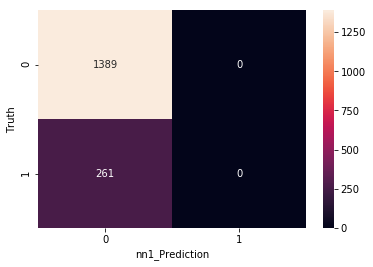

In [56]:
ax = sns.heatmap(confusion_matrix(y1_test, y1_pred_nn), annot=True, fmt='d')
ax.set(xlabel='nn1_Prediction', ylabel='Truth')

In [57]:
print(classification_report(y1_test, y1_pred_nn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1389
           1       0.00      0.00      0.00       261

    accuracy                           0.84      1650
   macro avg       0.42      0.50      0.46      1650
weighted avg       0.71      0.84      0.77      1650



C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The neural network did not classify under-represented class 1 correctly.
Conclusion: Neural networks perform better on larger number of training instances.